# Importing the Required Libraries

In [2]:
! pip install -U scikit-learn


In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification, make_blobs
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import seaborn as sns


# Importing the Dataset

The CSV dataset file for this project is freely available at this link
(https://bit.ly/3kxXvCl ).

In [4]:
dataset = pd.read_csv(r'/workspaces/Projects/Mall_Customers.csv')
dataset.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
dataset.shape


(200, 5)

# Data Analysis
Let’s plot a histogram showing the annual income of the customers.

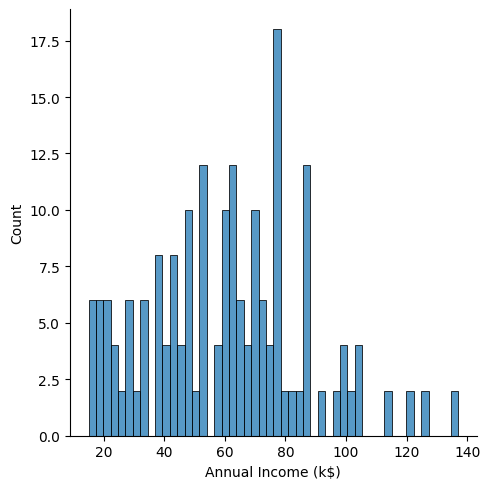

In [6]:
sns.displot(dataset['Annual Income (k$)'], kde=False, bins = 50)


The output shows that most of the customers have incomes between 60 and 90K per year.

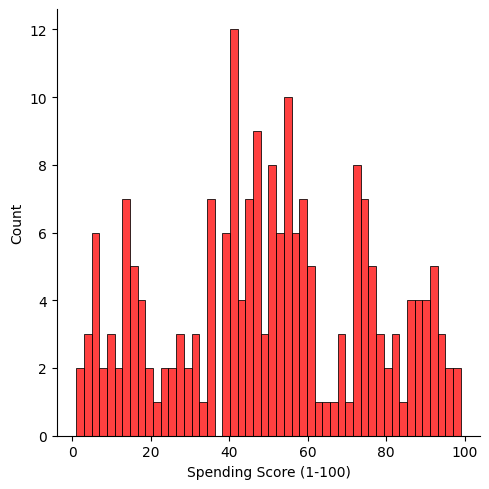

In [8]:
sns.displot(dataset['Spending Score (1-100)' ], kde=False, bins = 50, color = "red" )


The output shows that most of the customers have a spending score between 40 and 60.

We can also plot a regression line between annual income and spending score to see if there is any linear relationship between the two or not.

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

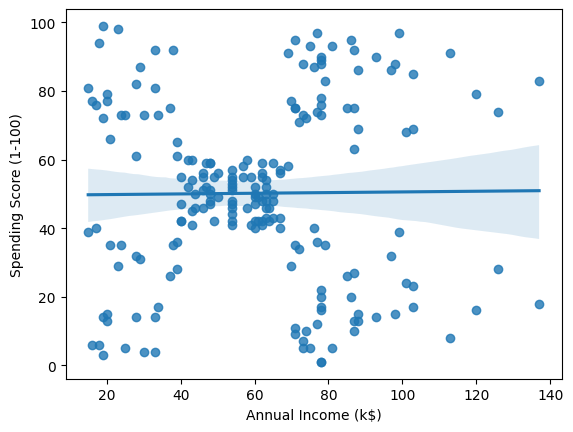

In [9]:
sns.regplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=dataset)


From the straight line in the below output, you can infer that there is no linear relation between annual income and spending.

Finally, you can also plot a linear regression line between the Age column and the
spending score.

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

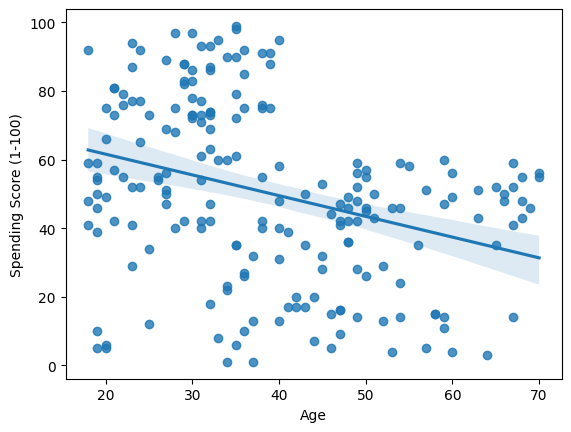

In [10]:
sns.regplot(x="Age", y="Spending Score (1-100)", data=dataset)


The output confirms an inverse linear relationship between age and spending score.
It can be inferred from the output that young people have higher spending
compared to older people.

Enough of the data analysis. We are now ready to perform customer segmentation
on our data using the K-Means algorithm.

# K-Means Clustering

We want to perform K-Means clustering based on the annual income and spending
score columns because we want to target the customer base with high income and
high spending scores. Therefore, we will filter these two columns and will remove
the remaining columns from our dataset.

In [11]:
dataset = dataset.filter(["Annual Income (k$)", "Spending Score (1-100)"], axis = 1)
dataset.head()


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


The output shows that we now have only the annual income and spending score
columns in our dataset. 

To implement K-Means clustering, you can use the K-Means class from the
sklearn.cluster module of the Sklearn library. You have to pass the number of
clusters as an attribute to the K-Means class constructor. To train the K-Means
model, simply pass the dataset to the fit() method of the K-Means class, as shown
below.

In [12]:
# performing kmeans clustering using KMeans class
km_model = KMeans(n_clusters=4)
km_model.fit(dataset)


KMeans(n_clusters=4)

In [119]:
KMeans(n_clusters=4)


KMeans(n_clusters=4)

Once the model is trained, you can print the cluster centers using the
cluster_centers_attribute of the K-Means class object.

In [13]:
#printing centroid values
print (km_model.cluster_centers_)


[[48.16831683 43.3960396 ]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [87.         18.63157895]]


The four cluster centers as predicted by our K-Means model has the following values

the K-Means class also assigns a cluster label to each data point. The cluster labels are numbers that basically serve as cluster id.

For instance, in the case of four clusters, the cluster ids are 0,1,2,3. To print the cluster ids for all the labels, you can use the labels_attribute of the KMeans class.

In [121]:
print (km_model.labels_)


[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


prints the clusters in different colors along with the cluster centers as black data points

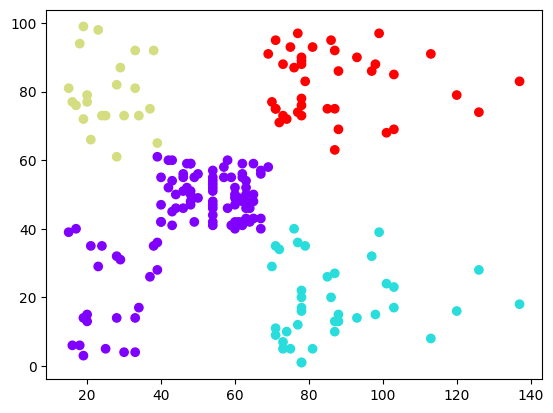

In [122]:
#pring the data points
plt.scatter(dataset.values[:,0], dataset.values[:,1], c= km_model.labels_, cmap='rainbow')


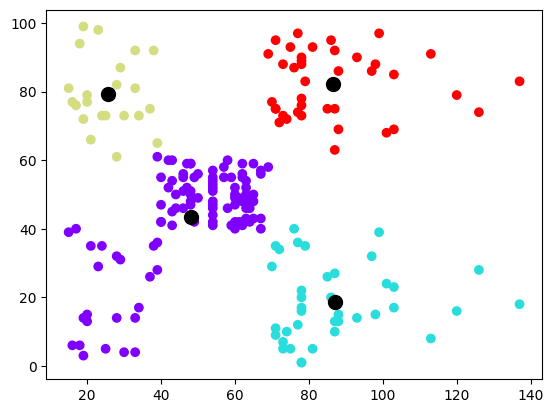

In [123]:
#print the centroids
plt.scatter(dataset.values[:,0], dataset.values[:,1], c= km_model.labels_, cmap='rainbow')
plt.scatter(km_model.cluster_centers_[:, 0], km_model.cluster_centers_[:, 1], s=100, c='black')


# Elbow Method for Finding K Value
the value of inertia obtained by training K-Means clusters with different number of K is plotted on a graph.

The inertia represents the total distance between the data points within a cluster.
Smaller inertia means that the predicted clusters are robust and close to the actual
clusters.

To calculate the inertia value, you can use the inertia_attribute of the K-Means class
object. The following script creates inertial values for K=1 to 10 and the plots in the
form.

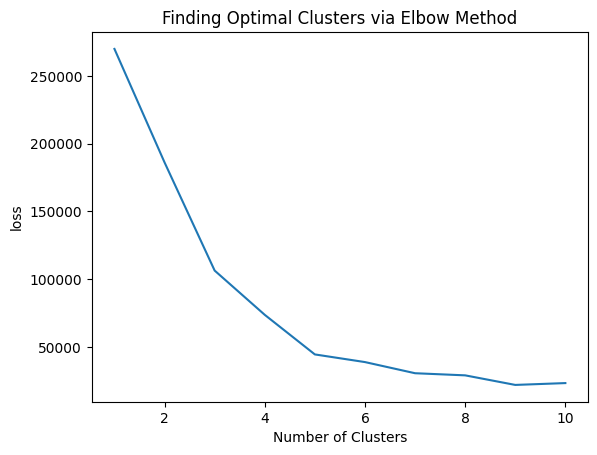

In [124]:
# training KMeans on K values from 1 to 10
loss =[]
for i in range(1, 11):
    km = KMeans(n_clusters = i).fit(dataset)
    loss.append(km.inertia_)
#printing loss against number of clusters
import matplotlib.pyplot as plt
plt.plot(range(1, 11), loss)
plt.title('Finding Optimal Clusters via Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('loss')
plt.show()


From the output below, it can be seen that the value of inertia didn’t decrease much
after five clusters.

Let’s now segment our customer data into five groups by creating five clusters.

In [125]:
# performing kmeans clustering using KMeans class
n_clusters=6

km_model = KMeans(n_clusters=6)
km_model.fit(dataset)


KMeans(n_clusters=6)

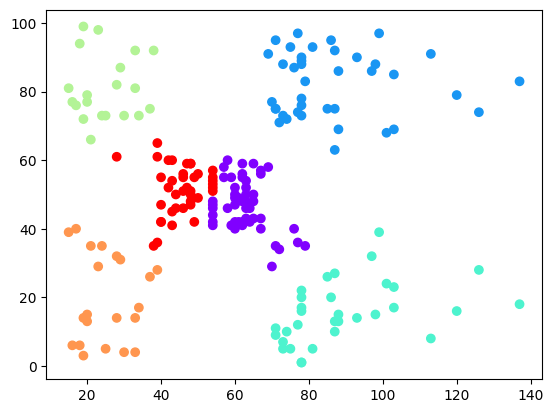

In [127]:
#pring the data points
plt.scatter(dataset.values[:,0], dataset.values[:,1], c= km_model.labels_, cmap='rainbow')


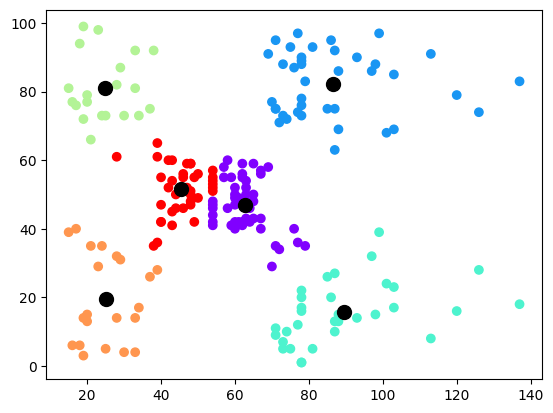

In [128]:
#print the centroids
plt.scatter(dataset.values[:,0], dataset.values[:,1], c= km_model.labels_, cmap='rainbow')

plt.scatter(km_model.cluster_centers_[:, 0], km_model.cluster_centers_[:, 1], s=100, c='black')


From the above output, you can see that the customers are divided into five
segments. The customers in the middle of the plot (in purple) are the customers
with an average income and average spending. The customers belonging to the red
cluster are the ones with a low income and low spending. You need to target the
customers who belong to the top right cluster (sky blue). These are the customers
with high incomes and high spending in the past, and they are more likely to spend
in the future, as well. So any new marketing campaigns or advertisements should be
directed at these customers.

# Finding Customers to Target for Marketing

In [129]:
#printing centroid values
print (km_model.cluster_centers_)


[[62.73469388 46.91836735]
 [86.53846154 82.12820513]
 [89.40625    15.59375   ]
 [24.95       81.        ]
 [25.14285714 19.52380952]
 [45.51282051 51.51282051]]


To fetch all the records from the cluster with id 1, we will first create a dataframe
containing index values of all the records in the dataset and their corresponding
cluster labels, as shown below.

In [130]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = dataset.index.values
cluster_map['cluster'] = km_model.labels_
cluster_map


,data_index,cluster
0,0,4
1,1,3
2,2,4
3,3,3
4,4,4
...,...,...
195,195,1
196,196,2
197,197,1
198,198,2


Next, we can simply filter all the records from the cluster_map dataframe, where
the value of the cluster column is 1. Execute the following script to do so.

In [131]:
cluster_map = cluster_map[cluster_map.cluster==1]
cluster_map.head()


,data_index,cluster
123,123,1
125,125,1
127,127,1
129,129,1
131,131,1


Here are the first five records that belong to cluster 1. These are the customers that
have high incomes and high spending.

Further Readings – Customer Segmentation via Clustering
To study more about clustering for customer segmentation, look at these links:
https://bit.ly/3nqe9FI
https://bit.ly/36EApVw
https://bit.ly/3nqhiW4